In [43]:
import pandas as pd

df = pd.read_csv("avocado.csv") #reading in a csv file and creating a dataframe from that data
df.head(5) #shows the first 5 elements in our dataframe

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


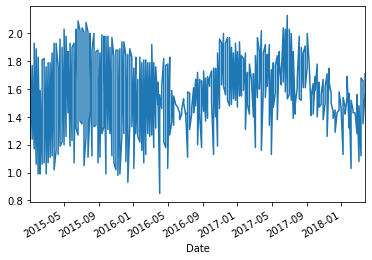

In [86]:
#here we will do some basic formatting of the data and plot a basic graph of data from Albany

df['Date'] = pd.to_datetime(df["Date"]) #pandas function converting dates to datetime, 
#which is important for pandas to recongnize that something is a date

albany_df = df.copy()[df["region"]=="Albany"] #creating a copy of our dataframe with only data from albany
albany_df.set_index("Date", inplace=True) #sets index to be the date, inplace means that it 
#rewrites the object, instead of creating a new one

albany_df["AveragePrice"].plot() #plots a graph with the date(index) being the X axis and the Y axis being the data from column "AveragePrice"
#From this graph below, we can see that the graph is very saturated, due to how many data points we have
#To get a better visualation we will make a rolling average

In [87]:
albany_df.index
#here we can see that our index is out of order, to solve this we will sort it

DatetimeIndex(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
               '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
               '2015-11-01', '2015-10-25',
               ...
               '2018-03-11', '2018-03-04', '2018-02-25', '2018-02-18',
               '2018-02-11', '2018-02-04', '2018-01-28', '2018-01-21',
               '2018-01-14', '2018-01-07'],
              dtype='datetime64[ns]', name='Date', length=338, freq=None)

In [88]:
albany_df.sort_index(inplace=True) #sorts the index
albany_df.index

DatetimeIndex(['2015-01-04', '2015-01-04', '2015-01-11', '2015-01-11',
               '2015-01-18', '2015-01-18', '2015-01-25', '2015-01-25',
               '2015-02-01', '2015-02-01',
               ...
               '2018-02-25', '2018-02-25', '2018-03-04', '2018-03-04',
               '2018-03-11', '2018-03-11', '2018-03-18', '2018-03-18',
               '2018-03-25', '2018-03-25'],
              dtype='datetime64[ns]', name='Date', length=338, freq=None)

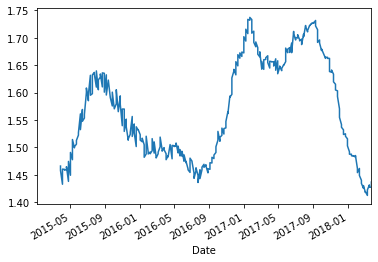

In [89]:
#Here we will make a rolling average of the prices to produce a better graph

albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean() 
#We create a new column with the data being the rolling average of the past 25 values

albany_df['price25ma'].plot()
#now our graph looks much better, but we have missing datafields in the begining due to how rolling averages works

In [90]:
albany_df.head(3)
#we can see that these fields are NaN, which is essentially just null, to fix this we just drop these points when we plot the graph

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,NaN


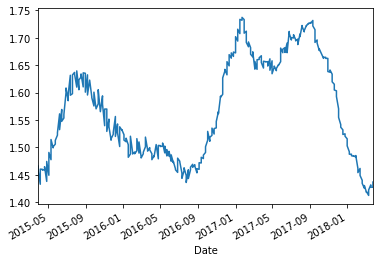

In [91]:
albany_df['price25ma'].dropna().plot()